In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [2]:
df = pd.read_csv('NFLX_stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/1/20,532.599976,557.390015,532.450012,556.549988,556.549988,9572700
1,9/2/20,553.780029,556.500000,537.369995,552.840027,552.840027,5886900
2,9/3/20,545.000000,554.000000,521.320007,525.750000,525.750000,9071100
3,9/4/20,520.179993,527.359985,485.980011,516.049988,516.049988,8270100
4,9/8/20,498.399994,522.000000,495.000000,507.019989,507.019989,5572700
...,...,...,...,...,...,...,...
247,8/25/21,550.159973,552.840027,545.450012,547.580017,547.580017,2065600
248,8/26/21,546.159973,552.599976,545.900024,550.119995,550.119995,1595500
249,8/27/21,551.599976,564.169983,549.250000,558.919983,558.919983,3251100
250,8/30/21,557.250000,567.159973,556.450012,566.179993,566.179993,2434800


In [3]:
#get the number of trading days
df.shape

(252, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/1/20,532.599976,557.390015,532.450012,556.549988,556.549988,9572700
1,9/2/20,553.780029,556.500000,537.369995,552.840027,552.840027,5886900
2,9/3/20,545.000000,554.000000,521.320007,525.750000,525.750000,9071100
3,9/4/20,520.179993,527.359985,485.980011,516.049988,516.049988,8270100
4,9/8/20,498.399994,522.000000,495.000000,507.019989,507.019989,5572700


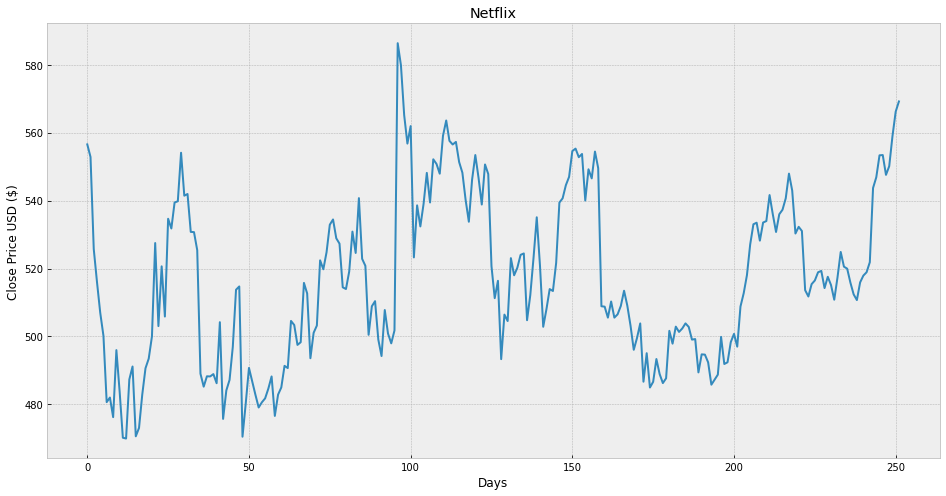

In [5]:
#visualize the close prize data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [6]:
#Get The Close Price
df_close = df['Close']
df_close


0      556.549988
1      552.840027
2      525.750000
3      516.049988
4      507.019989
          ...    
247    547.580017
248    550.119995
249    558.919983
250    566.179993
251    569.190002
Name: Close, Length: 252, dtype: float64

In [7]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#create a new column shifted 'x' units/days up
df['Prediction'] = df['Close'].shift(-future_days)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,9/1/20,532.599976,557.390015,532.450012,556.549988,556.549988,9572700,534.659973
1,9/2/20,553.780029,556.500000,537.369995,552.840027,552.840027,5886900,531.789978
2,9/3/20,545.000000,554.000000,521.320007,525.750000,525.750000,9071100,539.440002
3,9/4/20,520.179993,527.359985,485.980011,516.049988,516.049988,8270100,539.809998
4,9/8/20,498.399994,522.000000,495.000000,507.019989,507.019989,5572700,554.090027


In [8]:
df.tail(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
248,8/26/21,546.159973,552.599976,545.900024,550.119995,550.119995,1595500,NaN
249,8/27/21,551.599976,564.169983,549.250000,558.919983,558.919983,3251100,NaN
250,8/30/21,557.250000,567.159973,556.450012,566.179993,566.179993,2434800,NaN
251,8/31/21,566.119995,569.479980,561.609985,569.190002,569.190002,2429600,NaN


In [9]:
#create the future dataset x and convert it to a numpy array and remove the last 'x' rows/day
X = np.array(df.drop(['Prediction'],axis=1))[:-future_days]
print(X)

[['9/1/20' 532.599976 557.390015 ... 556.549988 556.549988 9572700]
 ['9/2/20' 553.780029 556.5 ... 552.840027 552.840027 5886900]
 ['9/3/20' 545.0 554.0 ... 525.75 525.75 9071100]
 ...
 ['7/23/21' 512.159973 517.409973 ... 515.409973 515.409973 3820500]
 ['7/26/21' 514.380005 521.130005 ... 516.48999 516.48999 2254500]
 ['7/27/21' 518.080017 521.950012 ... 518.909973 518.909973 2759000]]


In [10]:
#create the target dataset y and convert it to a numpy array and get all of the target values except the last x rows/days 
y = np.array(df['Prediction'])[:-future_days]
y


array([534.659973, 531.789978, 539.440002, 539.809998, 554.090027,
       541.450012, 541.940002, 530.789978, 530.719971, 525.419983,
       489.049988, 485.230011, 488.279999, 488.23999 , 488.929993,
       486.23999 , 504.209991, 475.73999 , 484.119995, 487.220001,
       496.950012, 513.76001 , 514.72998 , 470.5     , 480.23999 ,
       490.76001 , 486.769989, 482.839996, 479.100006, 480.630005,
       481.790009, 484.670013, 488.23999 , 476.619995, 482.880005,
       485.      , 491.359985, 490.700012, 504.579987, 503.380005,
       497.519989, 498.309998, 515.780029, 512.659973, 493.600006,
       501.089996, 503.220001, 522.419983, 519.780029, 524.830017,
       532.900024, 534.450012, 528.909973, 527.330017, 514.47998 ,
       513.969971, 519.119995, 530.869995, 524.590027, 540.72998 ,
       522.859985, 520.799988, 500.48999 , 508.890015, 510.399994,
       499.100006, 494.25    , 507.790009, 500.859985, 497.980011,
       501.769989, 586.340027, 579.840027, 565.169983, 556.780

In [11]:
#split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
x_train
x_test
y_train
y_test

array([540.02002 , 541.450012, 534.450012, 559.070007, 547.820007,
       497.      , 524.030029, 504.790009, 495.079987, 490.76001 ,
       524.830017, 522.859985, 514.72998 , 541.640015, 470.5     ,
       518.909973, 497.890015, 535.97998 , 539.450012, 480.23999 ,
       515.409973, 520.799988, 513.630005, 548.159973, 501.339996,
       508.049988, 554.580017, 488.23999 , 488.23999 , 552.780029,
       535.090027, 499.549988, 527.330017, 512.659973, 510.820007,
       534.659973, 520.809998, 500.48999 , 514.47998 , 554.090027,
       533.97998 , 510.399994, 549.570007, 503.859985, 547.919983,
       546.150024, 490.700012, 522.419983, 499.23999 , 538.849976,
       485.230011, 508.779999, 546.880005, 504.540009, 508.890015,
       486.690002, 539.039978])

In [19]:
#Split the data into training testing 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

#create a decision tree model  
tree  DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

#Get the last 'x rows of the feature data set
x_future = df.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future
x_future.shape

#show the model tree prediction
tree_prediction = tree.predict(x_future)
print("Tree Model Predection")
tree_prediction 
print("Linear Model Prediction")
lr_prediction = lr.predict(x_future)
lr_prediction

#visualize the data
#predictions = tree_prediction
valid['Predictions'] = predictions

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[[['Close', 'Predictions']]])
plt.legend(['Orig','Val','Pred'])
plt.show()

ValueError: could not convert string to float: '5/21/21'

NameError: name 'predictions' is not defined